In [8]:
# Acess AIMIP example data

In [9]:
import xarray as xr
import s3fs

In [10]:
fs = s3fs.S3FileSystem(client_kwargs={'endpoint_url': 'https://s3.eu-dkrz-1.dkrz.cloud'},anon=True)

In [11]:
# We only list files interpolated on regular grid (gr)
files = fs.glob('ai-mip/MPI-M/MPI-ESM1-2-LR/aimip/r1i1p1f1/Amon/*/gr/*/*')
# Variables you want to analyse
selected_vars = ['tas', 'pr', 'ps']
selected_files = [f for f in files if any(f"/{var}/" in f for var in selected_vars)]
open_files = [fs.open(f) for f in selected_files]

# Open files with Xarray
ds = xr.open_mfdataset(
    open_files,
    engine='h5netcdf',
    combine='by_coords'
)

In [12]:
ds

<xarray.Dataset>
Dimensions:    (time: 432, lat: 180, lon: 360, bnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    height     float64 2.0
Dimensions without coordinates: bnds
Data variables:
    pr         (time, lat, lon) float32 dask.array<chunksize=(240, 180, 360), meta=np.ndarray>
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(240, 2), meta=np.ndarray>
    lat_bnds   (time, lat, bnds) float64 dask.array<chunksize=(240, 180, 2), meta=np.ndarray>
    lon_bnds   (time, lon, bnds) float64 dask.array<chunksize=(240, 360, 2), meta=np.ndarray>
    ps         (time, lat, lon) float32 dask.array<chunksize=(240, 180, 360), meta=np.ndarray>
    tas        (time, lat, lon) float32 dask.array<chunksize=(240, 180, 360), meta=np.ndarray>
Attributes: (12/45)
    Conventions:           CF-1.7 CMIP-6.2
    activity_id:           CMIP
    branch_method:         no parent
    contact:               cmip6-mpi-esm@dkrz.de
    creation_date:         2020-06-05T18:00:23Z
    data_specs_version:    01.00.30
    ...                    ...
    title:                 MPI-ESM1-2-LR output prepared for CMIP6
    variable_id:           pr
    variant_label:         r1i1p1f1
    license:               CMIP6 model data produced by MPI-M is licensed und...
    cmor_version:          3.5.0
    tracking_id:           hdl:21.14100/4329af53-b5ff-4fd7-95cb-b64d919ade8a

Download all data for MPI-M model

In [14]:
fs.get('ai-mip/MPI-M/', './MPI-M-local/', recursive=True)

Model mean

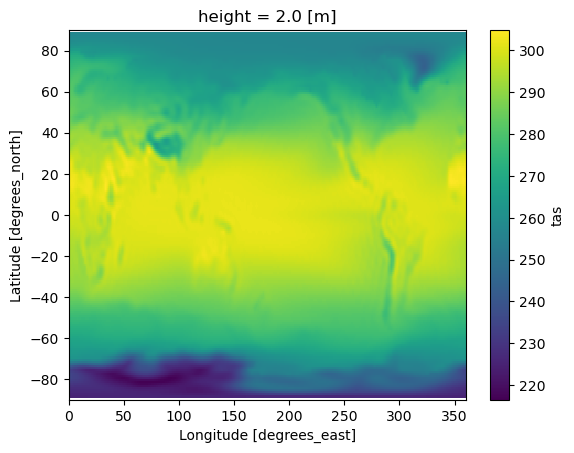

In [15]:
ds['tas'].mean(dim='time').plot()